In [2]:
data1= catalog.load('comforme_data')
data2= catalog.load('Xtrain')# trino
data3= catalog.load('ytrain')# teste

[04/13/23 08:46:57] INFO     Loading data from 'comforme_data' (ParquetDataSet)...              ]8;id=644548;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=673809;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'Xtrain' (ParquetDataSet)...                     ]8;id=115378;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=313167;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'ytrain' (ParquetDataSet)...                     ]8;id=630981;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=501963;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [3]:
data= catalog.load('filt_shot_type3pt')

[04/13/23 08:46:58] INFO     Loading data from 'filt_shot_type3pt' (ParquetDataSet)...          ]8;id=964620;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=326906;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [4]:
import requests
#data depploy com flask
import pandas as pd

In [5]:
conformed =data[['lat','lon','minutes_remaining','period','playoffs','shot_distance','shot_type']]
df_json= data2.to_json( orient='records')# base treino


## Exempolo da aula 

In [94]:
### Exempolo da aula com mlflow
url= 'http://localhost:5005'
dados ={
    "instances":[
        {'float':{'lat': 33.9203,
                     'lon': -118.3438,
                     'minutes_remaining': 0.0,
                     'period': 2.0,
                     'playoffs': 0.0,
                     'shot_distance': 14.0}}
    ]
}

results =requests.post(url, json=dados)
results.status_code

404

In [ ]:
results.json()# resultado do meu modelo

## Exemplo com flask

In [31]:
df_json= data2.to_json( orient='records')# base treino


In [86]:
url= 'http://127.0.0.1:5005'
data = df_json
#header ={'Content-type': 'application/json'}
r=requests.post(url=url,data=data)#, headers=header)
r.status_code



404

In [96]:
#r.json()# resultado do modelo

In [17]:
pd.DataFrame(r.json(), columns =r.json()[0].keys()) # transformando em dataframe o resultado da predição

# NOVO MODELO PARA TESTE

In [105]:
import typer
import pandas as pd
import sklearn
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sklearn.metrics as metrics
import mlflow
from sklearn.metrics import mean_absolute_error, r2_score
import math
from xgboost import XGBRFRegressor 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pycaret.classification import ClassificationExperiment 
from pycaret.classification import *
from pycaret.regression import *
from sklearn.metrics import log_loss


In [98]:
data1= catalog.load('comforme_data')
data2= catalog.load('Xtrain')# trino
data3= catalog.load('ytrain')# teste
type3ptt= catalog.load('shot_type3ptt')# teste

[04/17/23 09:56:01] INFO     Loading data from 'comforme_data' (ParquetDataSet)...              ]8;id=279165;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=740816;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

2023-04-17 09:56:01.016 Loading data from 'comforme_data' (ParquetDataSet)...


                    INFO     Loading data from 'Xtrain' (ParquetDataSet)...                     ]8;id=85955;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=954303;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

2023-04-17 09:56:01.736 Loading data from 'Xtrain' (ParquetDataSet)...


                    INFO     Loading data from 'ytrain' (ParquetDataSet)...                     ]8;id=219841;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=618586;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

2023-04-17 09:56:01.804 Loading data from 'ytrain' (ParquetDataSet)...


                    INFO     Loading data from 'shot_type3ptt'                                  ]8;id=924855;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=508354;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\
                             (MlflowMlflowModelSaverDataSet)...                                                    

2023-04-17 09:56:01.848 Loading data from 'shot_type3ptt' (MlflowMlflowModelSaverDataSet)...


In [119]:
test3pt =type3ptt[['lat','lon','minutes_remaining','period','playoffs','shot_distance','shot_made_flag']].astype('float64')
test3pt.dropna(inplace=True)

In [24]:

X = data1.iloc[:, :-1] 
y = data1.iloc[:, 6:] 

scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
def logist_regre(data2):
    exp= RegressionExperiment()
    exp.setup(data2,session_id =456, n_jobs=-2, log_experiment='mlflow', experiment_name='logist_regressor')
    exp.add_metric('logloss', 'Log Loss', log_loss, greater_is_better=False) 
    model_lr = exp.create_model('lr')
    return model_lr

In [109]:
def randonForest(data2):
    exp=ClassificationExperiment()
    exp.setup(data2,session_id =456, n_jobs=-2, log_experiment='mlflow', experiment_name='logist_regressor')
    exp.add_metric('logloss', 'Log Loss', log_loss, greater_is_better=False) 
    model_rf = exp.create_model('rf')
    return model_rf

In [120]:
randonForest(test3pt)

,Description,Value
0,Session id,456
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(5412, 7)"
4,Transformed data shape,"(5412, 7)"
5,Transformed train set shape,"(3788, 7)"
6,Transformed test set shape,"(1624, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.6306,0.5610,0.2160,0.3913,0.2784,0.0571,0.0617,5.8890
1,0.5726,0.4365,0.1840,0.2771,0.2212,-0.0571,-0.0594,6.8144
2,0.6332,0.5069,0.2080,0.3939,0.2723,0.0574,0.0626,5.8469
3,0.6016,0.5488,0.2160,0.3375,0.2634,0.0081,0.0085,6.3517
4,0.6069,0.5157,0.1920,0.3333,0.2437,0.0034,0.0036,6.2676
5,0.6016,0.4937,0.1680,0.3088,0.2176,-0.0193,-0.0209,6.3517
6,0.6201,0.5280,0.1440,0.3273,0.2000,-0.0019,-0.0022,6.0573
7,0.6517,0.5828,0.2500,0.4429,0.3196,0.1093,0.1174,5.5525
8,0.6138,0.5165,0.1694,0.3281,0.2234,0.0001,0.0001,6.1576


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-2, oob_score=False,
                       random_state=456, verbose=0, warm_start=False)

In [26]:
import joblib


In [27]:
logist_regre(type3ptt)#base teste

,Description,Value
0,Session id,456
1,Target,shot_id
2,Target type,Regression
3,Original data shape,"(6426, 25)"
4,Transformed data shape,"(6426, 67)"
5,Transformed train set shape,"(4498, 67)"
6,Transformed test set shape,"(1928, 67)"
7,Numeric features,13
8,Categorical features,11
9,Rows with missing values,15.8%


,MAE,MSE,RMSE,R2,RMSLE,MAPE,Log Loss
Fold,,,,,,,
0,1340.8698,5495850.0863,2344.3229,0.9250,0.3615,0.2841,-0.0000
1,1141.0079,4011112.5124,2002.7762,0.9408,0.3239,0.2242,-0.0000
2,1259.5338,5093724.4900,2256.9281,0.9280,0.5509,1.5780,-0.0000
3,1212.9626,4232618.2826,2057.3328,0.9388,0.3757,0.3922,-0.0000
4,1192.5460,4566340.4720,2136.8997,0.9347,0.4566,0.7049,-0.0000
5,1088.6055,3992341.9068,1998.0846,0.9353,0.2801,0.1695,-0.0000
6,1212.6411,4580933.1142,2140.3115,0.9344,0.3174,0.2192,-0.0000
7,1053.0951,3396625.1380,1842.9935,0.9483,0.3130,0.2098,-0.0000
8,1174.2020,4732799.0192,2175.4997,0.9288,0.3642,0.2646,-0.0000


LinearRegression(n_jobs=-2)

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
lr_pred = lr.predict(X_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(5)

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [143]:
df_json= data2.to_json( orient='records')# base treino
url= 'http://127.0.0.1:5005/prever'
data = df_json
#header ={'Content-type': 'application/json'}
r=requests.post(url=url,data=data)#, headers=header)
r.status_code

404

In [81]:


@app.route('/prever', methods=['POST'])
def prever():
    dados = request.json  # Recebe os dados enviados como JSON
    # Faça o pré-processamento dos dados, se necessário
    # Faça a previsão usando o modelo carregado
    dados_np= np.array(dados)
    resultado = model.predict(dados_np)
    # Retorne a resposta como JSON
    return jsonify({'resultado': resultado.tolist()})
    #return jsonify(dados)

if __name__ == '__main__':
    app.run(debug=True)

    
    
    # Importe as bibliotecas necessárias
from flask import Flask, jsonify, request
import mlflow.sklearn

# Carregue o modelo registrado do MLflow
model = mlflow.sklearn.load_model("runs:/<RUN_ID>/model")

# Crie o aplicativo Flask
app = Flask(__name__)

# Defina o endpoint para previsões
@app.route('/predict', methods=['POST'])
def predict():
    # Obtenha os dados de entrada da solicitação do cliente
    data = request.json
    
    # Faça a previsão usando o modelo carregado
    prediction = model.predict(data)
    
    # Retorne a resposta como JSON
    return jsonify(prediction.tolist())

# Inicie o servidor Flask
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

    
    
@app.route('/prever', methods=['POST'])
def prever():
    dados = {'nome': 'João', 'idade': 30}
    dados = request.json 

    return jsonify(dados)

if __name__ == '__main__':
    app.run(debug=True)
    

In [43]:
data1

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10.0,1.0,0.0,15.0,0.0
2,33.9093,-118.3708,7.0,1.0,0.0,16.0,1.0
3,33.8693,-118.1318,6.0,1.0,0.0,22.0,0.0
4,34.0443,-118.2698,6.0,2.0,0.0,0.0,1.0
5,34.0553,-118.4148,9.0,3.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...
30691,34.0443,-118.2698,7.0,4.0,1.0,0.0,0.0
30692,33.9963,-118.2688,6.0,4.0,1.0,4.0,0.0
30694,33.8783,-118.4038,3.0,4.0,1.0,21.0,1.0
30695,33.7773,-118.2388,2.0,4.0,1.0,26.0,0.0


In [44]:
from pycaret.classification import *
s = setup(data1, target = 'shot_made_flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(25697, 7)"
4,Transformed data shape,"(25697, 7)"
5,Transformed train set shape,"(17987, 7)"
6,Transformed test set shape,"(7710, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [45]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data1, target = 'shot_made_flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(25697, 7)"
4,Transformed data shape,"(25697, 7)"
5,Transformed train set shape,"(17987, 7)"
6,Transformed test set shape,"(7710, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [46]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6091,0.6136,0.3158,0.6221,0.4188,0.1693,0.1914,0.4950
gbc,Gradient Boosting Classifier,0.6079,0.6126,0.3163,0.6185,0.4185,0.1670,0.1885,0.3510
ridge,Ridge Classifier,0.5974,0.0000,0.4160,0.5668,0.4797,0.1638,0.1691,0.3750
lr,Logistic Regression,0.5973,0.6127,0.4151,0.5668,0.4791,0.1635,0.1688,0.8470
lda,Linear Discriminant Analysis,0.5973,0.6136,0.4166,0.5665,0.4800,0.1637,0.1689,0.2780
lightgbm,Light Gradient Boosting Machine,0.5958,0.6020,0.3684,0.5734,0.4484,0.1526,0.1620,0.3980
qda,Quadratic Discriminant Analysis,0.5914,0.6116,0.4832,0.5479,0.5135,0.1636,0.1646,0.3340
nb,Naive Bayes,0.5833,0.6113,0.5121,0.5346,0.5231,0.1533,0.1535,0.3150
xgboost,Extreme Gradient Boosting,0.5804,0.5899,0.4353,0.5369,0.4807,0.1351,0.1373,0.9250
rf,Random Forest Classifier,0.5697,0.5769,0.4719,0.5195,0.4945,0.1214,0.1219,2.4770


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6091,0.6136,0.3158,0.6221,0.4188,0.1693,0.1914,0.3490
gbc,Gradient Boosting Classifier,0.6079,0.6126,0.3163,0.6185,0.4185,0.1670,0.1885,0.4400
ridge,Ridge Classifier,0.5974,0.0000,0.4160,0.5668,0.4797,0.1638,0.1691,0.3460
lr,Logistic Regression,0.5973,0.6127,0.4151,0.5668,0.4791,0.1635,0.1688,0.2980
lda,Linear Discriminant Analysis,0.5973,0.6136,0.4166,0.5665,0.4800,0.1637,0.1689,0.3330
lightgbm,Light Gradient Boosting Machine,0.5958,0.6020,0.3684,0.5734,0.4484,0.1526,0.1620,0.3600
qda,Quadratic Discriminant Analysis,0.5914,0.6116,0.4832,0.5479,0.5135,0.1636,0.1646,0.3730
nb,Naive Bayes,0.5833,0.6113,0.5121,0.5346,0.5231,0.1533,0.1535,0.3450
xgboost,Extreme Gradient Boosting,0.5804,0.5899,0.4353,0.5369,0.4807,0.1351,0.1373,0.3130
rf,Random Forest Classifier,0.5697,0.5769,0.4719,0.5195,0.4945,0.1214,0.1219,0.5900


In [47]:
print(best)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


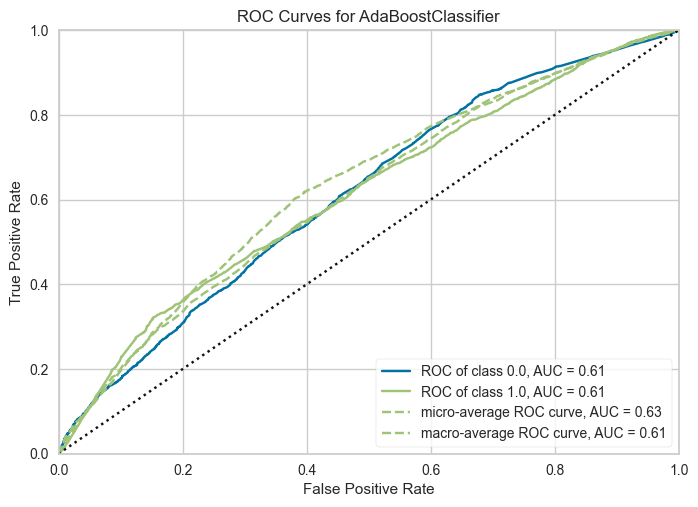

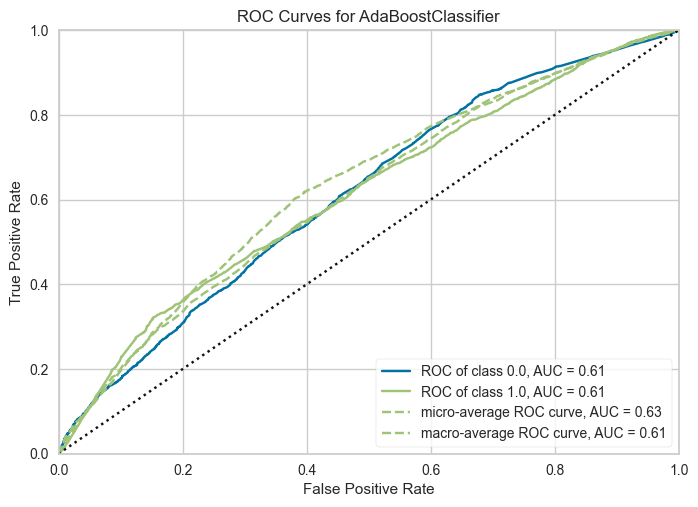

In [50]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')

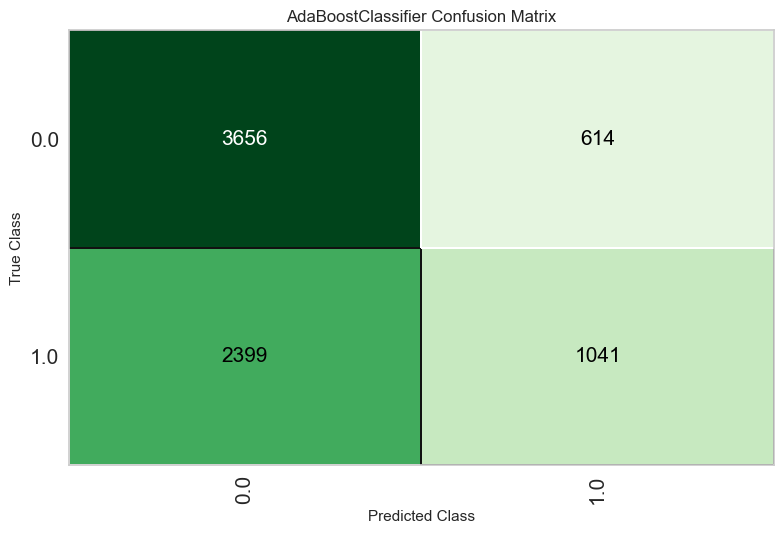

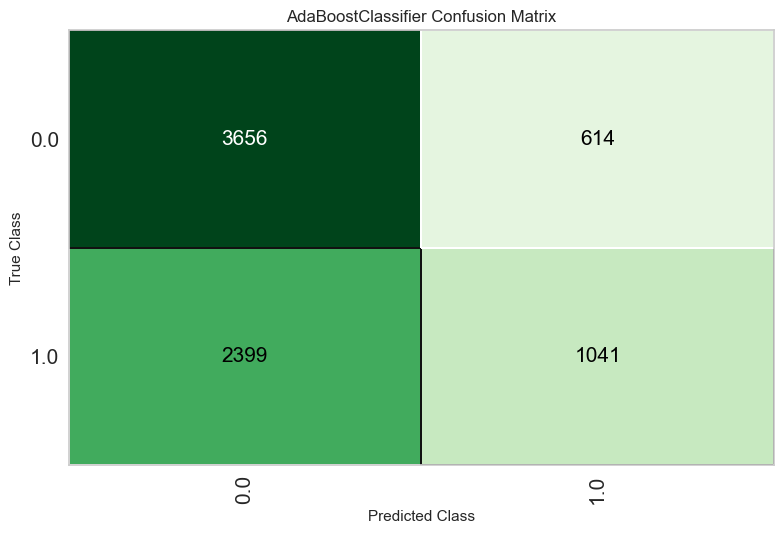

In [51]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [52]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.6092,0.6135,0.3026,0.6290,0.4086,0.1673,0.1923


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.6092,0.6135,0.3026,0.6290,0.4086,0.1673,0.1923


,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
20212,33.879299,-118.205803,6.0,3.0,0.0,17.0,0.0,0,0.5004
14334,34.044300,-118.269798,3.0,4.0,0.0,0.0,1.0,1,0.5020
8767,33.801300,-118.106796,6.0,4.0,0.0,29.0,1.0,0,0.5047
1844,34.037300,-118.154800,0.0,4.0,0.0,11.0,1.0,0,0.5033
2168,33.854301,-118.201797,9.0,3.0,0.0,20.0,0.0,0,0.5012
...,...,...,...,...,...,...,...,...,...
11273,33.983299,-118.222801,6.0,4.0,0.0,7.0,0.0,0,0.5016
6519,33.835300,-118.450798,10.0,3.0,0.0,27.0,0.0,0,0.5035
20421,33.939301,-118.304802,7.0,1.0,0.0,11.0,1.0,0,0.5007
12003,34.044300,-118.269798,3.0,2.0,0.0,0.0,1.0,1,0.5028


In [53]:
data3= catalog.load('ytrain')# teste
# functional API
predictions = predict_model(best, data=data3)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data3)
predictions.head()

[04/13/23 15:14:31] INFO     Loading data from 'ytrain' (ParquetDataSet)...                     ]8;id=68935;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=22432;file://C:\infnet-machine\KEDRO\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,prediction_label,prediction_score
30182,33.850300,-118.105797,2.0,3.0,1.0,25.0,0,0.5022
18783,33.835300,-118.424797,2.0,3.0,0.0,26.0,0,0.5037
27319,33.981300,-118.315804,5.0,4.0,1.0,7.0,0,0.5018
1652,33.881302,-118.334801,8.0,3.0,0.0,17.0,0,0.5010
6795,34.044300,-118.269798,9.0,3.0,0.0,0.0,1,0.5029


In [54]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['lat', 'lon', 'minutes_remaining',
                                              'period', 'playoffs',
                                              'shot_distance'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ve...
                  TransformerWrapper(exclude=None, include

In [57]:
# functional API
model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)
df_json= data2.to_json( orient='records')# base treino
predict_model()

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lat', 'lon', 'minutes_remaining',
                                             'period', 'playoffs',
                                             'shot_distance'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              ve...
                 

In [125]:
import streamlit as st
import pickle
from flask import Flask, request
import requests
import pandas as pd
 #escrevendo um título na página
#st.title('Minha primeira aplicação :sunglasses:')
import joblib
from flask import Flask, jsonify, request
import numpy as np
from flask import request
import mlflow
import requests

# Exemplo básico de um aplicativo Streamlit
import streamlit as st

import streamlit as st
import pycaret
import pandas as pd
import pickle

from transformers import pipeline
from pycaret.classification import load_model







#importando as bibliotecas
import pandas as pd
import streamlit as st
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split































st.title('ENGENHARIA DE MACHINE LEARNING')
# Título do aplicativo
st.title("Nba Kobe")


modelo = load_model('my_best_pipeline')
# Interface do usuário para fazer predições
st.write("Faça uma predição:")
minutes_remaining = st.slider("minutos restantes", 4.0, 3.0, 5.0)
period = st.slider("periodo", 2.0, 4.5, 3.0)
playoffs = st.slider("jogos decisivos", 0.0, 2.0, 4.0)
lat= st.slider("latitute", -0.0, 2.0, 1033)
lon= st.slider(float("longitute", -0.0, 2.0, 1033))
shot_distance= st.slider(float("distancia", 0.0, 5.0, 20))
# Realiza a predição
dados_predicao = pd.DataFrame({
    "minutes_remaining": [minutes_remaining],
    "period": [period],
    "playoffs": [playoffs], 
    "lat":[lat],
    "lon":[lon],
    "shot_distance":[shot_distance]
    
})
predicao = modelo.predict(dados_predicao)

# Exibe o resultado da predição
st.write("Resultado da predição:")

st.write(f"A predição é: {predicao}")


Transformation Pipeline and Model Successfully Loaded


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:84                                                                                   │
│                                                                                                  │
│    81 minutes_remaining = st.slider("minutos restantes", 4.0, 3.0, 5.0)                          │
│    82 period = st.slider("periodo", 2.0, 4.5, 3.0)                                               │
│    83 playoffs = st.slider("jogos decisivos", 0.0, 2.0, 4.0)                                     │
│ ❱  84 lat= st.slider("latitute", -0.0, 2.0, 1033)                                                │
│    85 lon= st.slider(float("longitute", -0.0, 2.0, 1033))                                        │
│    86 shot_distance= st.slider(float("distancia", 0.0, 5.0, 20))                                 │
│    87 # Realiza a predição                                                                       │
│                                                                                                  │
│ C:\infnet-machine\KEDRO\lib\site-packages\streamlit\runtime\metrics_util.py:311 in wrapped_func  │
│                                                                                                  │
│   308 │   │   │   │   # the telemetry never causes any issues.                                   │
│   309 │   │   │   │   _LOGGER.debug("Failed to collect command telemetry", exc_info=ex)          │
│   310 │   │   try:                                                                               │
│ ❱ 311 │   │   │   result = non_optional_func(*args, **kwargs)                                    │
│   312 │   │   finally:                                                                           │
│   313 │   │   │   # Activate tracking again if command executes without any exceptions           │
│   314 │   │   │   if ctx:                                                                        │
│                                                                                                  │
│ C:\infnet-machine\KEDRO\lib\site-packages\streamlit\elements\slider.py:331 in slider             │
│                                                                                                  │
│   328 │   │                                                                                      │
│   329 │   │   """                                                                                │
│   330 │   │   ctx = get_script_run_ctx()                                                         │
│ ❱ 331 │   │   return self._slider(                                                               │
│   332 │   │   │   label=label,                                                                   │
│   333 │   │   │   min_value=min_value,                                                           │
│   334 │   │   │   max_value=max_value,                                                           │
│                                                                                                  │
│ C:\infnet-machine\KEDRO\lib\site-packages\streamlit\elements\slider.py:494 in _slider            │
│                                                                                                  │
│   491 │   │   )                                                                                  │
│   492 │   │                                                                                      │
│   493 │   │   if not int_args and not float_args and not timelike_args:                          │
│ ❱ 494 │   │   │   raise StreamlitAPIException(                                                   │
│   495 │   │   │   │   "Slider value arguments must be of matching types."                        │
│   496 │   │   │   │   "\n`min_value` has %(min_type)s type."                                     │
│   497 │   │   │   │   "\n`max_value` has %(max_type)s type.